# 授课方法

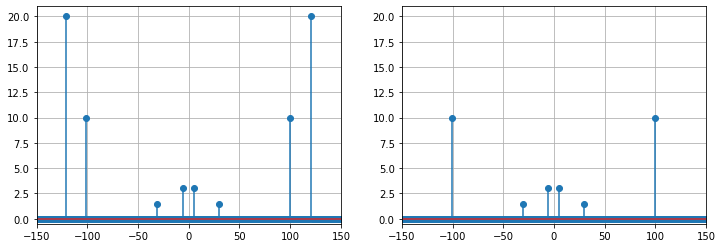

In [10]:
import numpy as np  # 导入 numpy 库，用于进行数学计算
import matplotlib.pyplot as plt  # 导入 matplotlib.pyplot 库，用于绘制图形
import math  # 导入 math 库，用于数学计算

# 定义一个函数，用于生成正弦波
def getSin(amp, freq, phase, sampleList):
    return amp * np.sin(-2 * math.pi * freq * sampleList + phase)

# 定义一个函数，用于生成余弦波
def getCos(amp, freq, phase, sampleList):
    return amp * np.cos(-2 * math.pi * freq * sampleList + phase)

# 1. 获得混合波形
srate = 3000  # 设置采样率为 3000
t = np.linspace(0, 1, srate)  # 在 0 到 1 的范围内生成等间距的采样点

# 分别生成4个正余弦波
s1 = getSin(amp=1.5, freq=30, phase=0, sampleList=t)
s2 = getCos(amp=3, freq=5, phase=0, sampleList=t)
s3 = getSin(amp=10, freq=100, phase=0, sampleList=t)
s4 = getCos(amp=20, freq=120, phase=0, sampleList=t)

m = s1 + s2 + s3 + s4  # 将三个正弦波相加，得到混合波形

# 2. 获得傅里叶系数
#Please do not hand over the code to me directly. Please remove my name :liuzhe and change it to yours
fCoefs = np.zeros(srate, dtype='complex')  # 创建一个复数类型的数组，用于存储傅里叶系数

# 循环计算每一个频率的傅里叶系数
for f in range(srate):
    p = m * np.exp(-1j * 2 * math.pi * f * t)  # 计算傅里叶积分的被积函数
    fCoefs[f] = np.sum(p)  # 对被积函数求和，得到傅里叶系数

# 3. 获得振幅列表：每一个绕线的重心到原点的距离
# 将傅里叶系数除以采样率，得到重心列表
# 然后再求
amp_list =2 * np.abs(fCoefs / srate)  #由于频率有负值，所以振幅被平分了，需要乘以2才能还原原始振幅

# 把频率轴从0~300 转变成 0~149 然后 -150~-1
freqs = np.fft.fftfreq(len(amp_list), 1/srate)

# 然后把 频率轴 和 数据 都变成 0hz 在中间，向左是负频率，向右是正频率的形式
amp_shifted=np.fft.fftshift(amp_list)
freq_shift=np.fft.fftshift(freqs)

# 绘制振幅列表
#优化前
fg ,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].stem(freq_shift,amp_shifted)
ax[0].set_xlim([-150,150])
ax[0].set_ylim([-0.5,21])
#ax[0].set_title('') #优化前
ax[0].grid()  # 添加网格线

#去噪
amp_shifted[(freq_shift>110) | (freq_shift<-110)]=0  #去除频率大于110hz和小于-110hz的噪音
amp_shifted = denoise(amp_shifted,1)    #去噪，将振幅小于1的噪声全部去除

'''
# 绘制振幅列表
plt.grid()  # 添加网格线
#plt.stem(amp_list)  # 绘制振幅列表的条形图（注意：由于频率有负值，所以振幅被平分了，需要乘以2才能还原原始振幅）
plt.stem(freq_shift,amp_shifted) #注意：由于频率有负值，所以振幅被平分了，需要乘以2才能还原原始振幅
plt.xlim([-150,150])
plt.ylim([-0.5,21])
plt.figure(figsize=(10, 4))  # 设置图形的尺寸
plt.show()
'''

#优化后
ax[1].stem(freq_shift,amp_shifted)
ax[1].set_xlim([-150,150])
ax[1].set_ylim([-0.5,21])
#ax[1].set_title('') #优化后
ax[1].grid()  # 添加网格线

#显示图形
plt.show()

In [6]:
print(amp_shifted)

[0. 0. 0. ... 0. 0. 0.]


# np.fft.fft方法

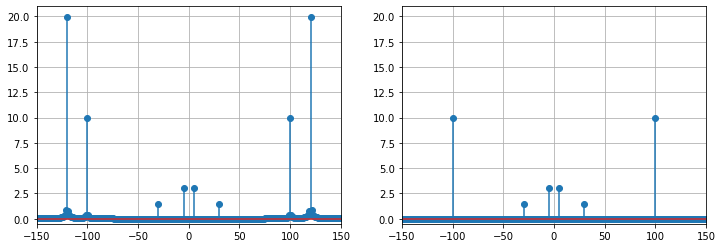

In [9]:
import numpy as np  # 导入 numpy 库，用于进行数学计算
import matplotlib.pyplot as plt  # 导入 matplotlib.pyplot 库，用于绘制图形
import math  # 导入 math 库，用于数学计算

# 定义一个函数，用于生成正弦波
def getSin(amp, freq, phase, sampleList):
    return amp * np.sin(-2 * math.pi * freq * sampleList + phase)

# 定义一个函数，用于生成余弦波
def getCos(amp, freq, phase, sampleList):
    return amp * np.cos(-2 * math.pi * freq * sampleList + phase)

#去噪函数
def denoise(arr,thresh):
    mask = arr > thresh
    mask = mask + 0
    return mask * arr

# 1. 获得混合波形
srate = 3000  # 设置采样率为 3000
t = np.linspace(0, 1, srate)  # 在 0 到 1 的范围内生成等间距的采样点

# 分别生成4个正余弦波
s1 = getSin(amp=1.5, freq=30, phase=0, sampleList=t)
s2 = getCos(amp=3, freq=5, phase=0, sampleList=t)
s3 = getSin(amp=10, freq=100, phase=0, sampleList=t)
s4 = getCos(amp=20, freq=120, phase=0, sampleList=t)

m = s1 + s2 + s3 + s4  # 将三个正弦波相加，得到混合波形

'''
# 2. 获得傅里叶系数
fCoefs = np.zeros(srate, dtype='complex')  # 创建一个复数类型的数组，用于存储傅里叶系数

# 循环计算每一个频率的傅里叶系数
for f in range(srate):
    p = m * np.exp(-1j * 2 * math.pi * f * t)  # 计算傅里叶积分的被积函数
    fCoefs[f] = np.sum(p)  # 对被积函数求和，得到傅里叶系数
'''

# 2.获得傅里叶系数
#Please do not hand over the code to me directly. Please remove my name :liuzhe and change it to yours
fCoefs = np.fft.fft(m,srate)

# 3. 获得振幅列表：每一个绕线的重心到原点的距离
# 将傅里叶系数除以采样率，得到重心列表
# 然后再求
amp_list =2 * np.abs(fCoefs / srate)  #由于频率有负值，所以振幅被平分了，需要乘以2才能还原原始振幅

# 把频率轴从0~300 转变成 0~149 然后 -150~-1
freqs = np.fft.fftfreq(len(amp_list), 1/srate)

# 然后把 频率轴 和 数据 都变成 0hz 在中间，向左是负频率，向右是正频率的形式
amp_shifted=np.fft.fftshift(amp_list)
freq_shift=np.fft.fftshift(freqs)

# 绘制振幅列表
#优化前
fg ,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].stem(freq_shift,amp_shifted)
ax[0].set_xlim([-150,150])
ax[0].set_ylim([-0.5,21])
#ax[0].set_title('') #优化前
ax[0].grid()  # 添加网格线

#去噪
amp_shifted[(freq_shift>110) | (freq_shift<-110)]=0  #去除频率大于110hz和小于-110hz的噪音
amp_shifted = denoise(amp_shifted,1)    #去噪，将振幅小于1的噪声全部去除

'''
# 绘制振幅列表
plt.grid()  # 添加网格线
#plt.stem(amp_list)  # 绘制振幅列表的条形图（注意：由于频率有负值，所以振幅被平分了，需要乘以2才能还原原始振幅）
plt.stem(freq_shift,amp_shifted) #注意：由于频率有负值，所以振幅被平分了，需要乘以2才能还原原始振幅
plt.xlim([-150,150])
plt.ylim([-0.5,21])
plt.figure(figsize=(10, 4))  # 设置图形的尺寸
plt.show()
'''

#优化后
ax[1].stem(freq_shift,amp_shifted)
ax[1].set_xlim([-150,150])
ax[1].set_ylim([-0.5,21])
#ax[1].set_title('') #优化后
ax[1].grid()  # 添加网格线

#显示图形
plt.show()